This notebook shows, how to compute RandomForest's accuracy scores for each value of `n_estimators` without retraining the model. No rocket science involved, but still useful.

# Load some data

In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

X, y = sklearn.datasets.load_digits(10,True)
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Step 1:** first fit a Random Forest to the data. Set `n_estimators` to a high value.

In [3]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Step 2:** Get predictions for each tree in Random Forest separately.

In [9]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_val)[None, :])
    
predictions

[array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.00900901,  0.01801802,  0.        , ...,  0.24324324,
           0.01801802,  0.        ],
         [ 0.        ,  0.0456621 ,  0.26940639, ...,  0.04109589,
           0.02739726,  0.07762557],
         ..., 
         [ 0.        ,  0.04807692,  0.        , ...,  0.        ,
           0.15384615,  0.14423077],
         [ 0.        ,  0.0456621 ,  0.26940639, ...,  0.04109589,
           0.02739726,  0.07762557],
         [ 0.        ,  0.49264706,  0.01470588, ...,  0.04411765,
           0.03676471,  0.02941176]]]),
 array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.00961538,  0.        , ...,  0.84615385,
           0.        ,  0.05769231],
         [ 0.        ,  0.05555556,  0.06481481, ...,  0.02777778,
           0.0787037 ,  0.06944444],
         ..., 
         [ 0.        ,  0.00961

**Step 3:** Concatenate the predictions to a tensor of size `(number of trees, number of objects, number of classes)`.

In [10]:
predictions = np.vstack(predictions)
predictions

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.00900901,  0.01801802,  0.        , ...,  0.24324324,
          0.01801802,  0.        ],
        [ 0.        ,  0.0456621 ,  0.26940639, ...,  0.04109589,
          0.02739726,  0.07762557],
        ..., 
        [ 0.        ,  0.04807692,  0.        , ...,  0.        ,
          0.15384615,  0.14423077],
        [ 0.        ,  0.0456621 ,  0.26940639, ...,  0.04109589,
          0.02739726,  0.07762557],
        [ 0.        ,  0.49264706,  0.01470588, ...,  0.04411765,
          0.03676471,  0.02941176]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.00961538,  0.        , ...,  0.84615385,
          0.        ,  0.05769231],
        [ 0.        ,  0.05555556,  0.06481481, ...,  0.02777778,
          0.0787037 ,  0.06944444],
        ..., 
        [ 0.        ,  0.00961538,  0.        , ...,

**Step 4:** Сompute cumulative average of the predictions. That will be a tensor, that will contain predictions of the random forests for each `n_estimators`.

In [15]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
cum_mean

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.00900901,  0.01801802,  0.        , ...,  0.24324324,
          0.01801802,  0.        ],
        [ 0.        ,  0.0456621 ,  0.26940639, ...,  0.04109589,
          0.02739726,  0.07762557],
        ..., 
        [ 0.        ,  0.04807692,  0.        , ...,  0.        ,
          0.15384615,  0.14423077],
        [ 0.        ,  0.0456621 ,  0.26940639, ...,  0.04109589,
          0.02739726,  0.07762557],
        [ 0.        ,  0.49264706,  0.01470588, ...,  0.04411765,
          0.03676471,  0.02941176]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.0045045 ,  0.0138167 ,  0.        , ...,  0.54469854,
          0.00900901,  0.02884615],
        [ 0.        ,  0.05060883,  0.1671106 , ...,  0.03443683,
          0.05305048,  0.07353501],
        ..., 
        [ 0.        ,  0.02884615,  0.        , ...,

**Step 5:** Get accuracy scores for each `n_estimators` value

In [18]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))
    
scores

[0.57999999999999996,
 0.64444444444444449,
 0.70666666666666667,
 0.74222222222222223,
 0.7844444444444445,
 0.81333333333333335,
 0.80666666666666664,
 0.81333333333333335,
 0.83777777777777773,
 0.84222222222222221,
 0.85333333333333339,
 0.87777777777777777,
 0.87555555555555553,
 0.87111111111111106,
 0.86888888888888893,
 0.8666666666666667,
 0.86888888888888893,
 0.87555555555555553,
 0.88444444444444448,
 0.89333333333333331,
 0.88666666666666671,
 0.89777777777777779,
 0.90000000000000002,
 0.89111111111111108,
 0.89777777777777779,
 0.89777777777777779,
 0.89555555555555555,
 0.89333333333333331,
 0.89555555555555555,
 0.90000000000000002,
 0.90222222222222226,
 0.90222222222222226,
 0.9044444444444445,
 0.90666666666666662,
 0.90888888888888886,
 0.90666666666666662,
 0.9044444444444445,
 0.90222222222222226,
 0.90666666666666662,
 0.90888888888888886,
 0.91333333333333333,
 0.9044444444444445,
 0.90222222222222226,
 0.91111111111111109,
 0.91111111111111109,
 0.908888888888

**That is it!** Plot the resulting scores to obtain similar plot to one that appeared on the slides.

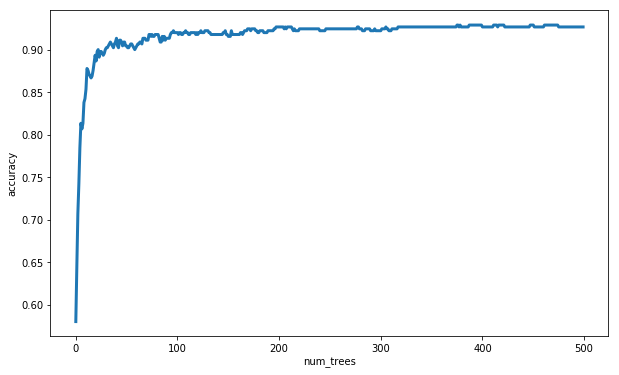

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');

We see, that 150 trees are already sufficient to have stable result.